# Semantically Segmenting Text Using Word Embeddings and Greedy Sequence Segmentation

This notebook illustrates how to use the text_segmentation_class in text_segmetnation.py to semantically segment a text document.The class converts a document's words into GloVe embeddings and uses the embedding information to semantically segment the document into k segmetns, where k is given.


In [15]:
%matplotlib inline

import spacy
import nltk
import os
from gensim.models import KeyedVectors
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import math
from scipy import spatial
import matplotlib.pyplot as plt
import mpld3

import text_segmentation as ts

# For interactive plots within the python notebook
mpld3.enable_notebook()

In [16]:
# the directory containing the Stanford GloVe model
# Change this to the proper path in your environment
glove_file = 'glove.6B.100d.txt'

# the document to be segmented
file_name="contrib.txt"

#changing glove to wor2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

/var/folders/8b/f7pdb5ds4w7323zvwcn2cryc0000gn/T/ipykernel_6479/3255059490.py:14: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


In [18]:


# Instantiating the text segmetnation class object
# seg_obj = ts.text_segmentation_class(file_name, glove_file)
seg_obj = ts.text_segmentation_class(file_name, tmp_file)


#seg_boj.doc contains the text of the document to be segmented
print(seg_obj.doc)

- We invite you to join the Flutter team, which is made up of volunteers and sponsored folk alike!

- There are many ways to contribute, including writing code, filing issues on GitHub, helping people
on our mailing lists, our chat channels, or on Stack Overflow, helping to triage, reproduce, or
fix bugs that people have filed, adding to our documentation,
doing outreach about Flutter, or helping out in any other way.


- We grant commit access (which includes full rights to the issue
database, such as being able to edit labels) to people who have gained
our trust and demonstrated a commitment to Flutter.
- For more details
see the [Contributor access](
page on our wiki.


- We communicate primarily over GitHub and [Discord](

Before you get started, we encourage you to read these documents which describe some of our community norms:

1.
- [Our code of conduct](CODE_OF_CONDUCT.md), which stipulates explicitly
   that everyone must be gracious, respectful, and professional.
- This
   al

In [19]:
# Find best segmentation boundaries to create n segments, for a given k
k=7

# Segment text into k segments using the greedy method
seg_obj.greedy_text_segmentation(k);

removing  hackers-deverl 816 432
deleted 815 431
removing  flutter-hackers 815 431
deleted 814 430
removing  hackers-triage 814 430
deleted 812 429
removing  hackers-releases 812 429
deleted 811 428
removing  quality-assurance 811 428
deleted 810 427
removing  post-commit 810 427
deleted 809 426
removing  code_of_conduct.md 809 426
deleted 807 425
removing  contributing.md 807 425
deleted 806 424
removing  hackers-engine 806 424
deleted 805 423
removing  hackers-devrel 805 423
deleted 804 422
removing  hixie 804 422
deleted 803 421
removing  objective-c. 803 421
deleted 802 420
removing  hackers-test 802 420
deleted 801 419
removing  hackers-framework 801 419
deleted 800 418
removing  devtools 800 418
deleted 796 417


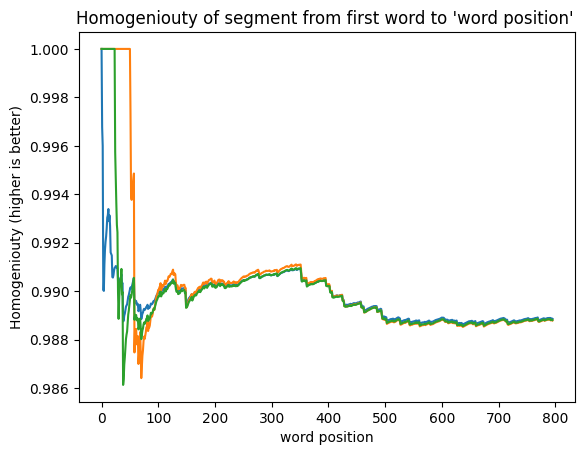

In [20]:
# type
# for each segment S from a word i to another word j in the document, 
# we measure D the average distance of each word in the segment from the segment's centroid
# The smaller that distance, the more homogeneneous the segment
# therefor, homogeniouty can be defined as 1-D
#
# Here we plot the homegeniouty of segments from the first word to each subsequent word in the text.

plt.plot(1-seg_obj.avg_dist[0,:])
plt.ylabel('Homogeniouty (higher is better)')
plt.xlabel('word position')
plt.title('Homogeniouty of segment from first word to \'word position\' ')
plt.plot(1-seg_obj.avg_dist[50,:])
plt.plot(1-seg_obj.avg_dist[23,:])
plt.show()

In [21]:
segments= seg_obj.get_segment_texts()

In [22]:
for i, seg in enumerate(segments):
    print("segment {}:\n{}\n====".format(i+1, seg))

segment 1:
- We invite you to join the Flutter team , which is made up of volunteers and sponsored folk alike ! - There are many ways to contribute , including writing code , filing issues on GitHub , helping people on our mailing lists , our chat channels , or on Stack Overflow , helping to triage , reproduce , or fix bugs that people have filed , adding to our documentation
====
segment 2:
, doing outreach about Flutter
====
segment 3:
, or helping out in any other way . - We grant commit access ( which includes full rights to the issue database , such as being able to edit labels ) to people who have gained our trust and demonstrated a commitment to Flutter . - For more details see the [ Contributor access ] ( page on our wiki . - We communicate primarily over GitHub and [ Discord ] ( Before you get started , we encourage you to read these documents which describe some of our community norms : 1 . - [ Our code of conduct ] ( CODE_OF_CONDUCT.md ) , which stipulates explicitly that ev